# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset, but on a new and very interesting dataset. We'll use the [Predict'em All](https://www.kaggle.com/semioniy/predictemall) dataset from Kaggle (download the dataset directly from them). This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), having coordinates, time, weather, population density, distance to pokestops/ gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to ping-pong must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. [The python docs](https://docs.python.org/3/), [keras docs](https://keras.io/), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

## 0. Imports

Import any necessary modules here.

In [275]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from keras.optimizers import Adam

## 1. Loading and extracting subset

Load the `'300k.csv'` file using pandas.

In [276]:
data_whole = pd.read_csv('300k.csv')

D:\SP_5\rep2\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [277]:
data_new_feature = pd.DataFrame(data_whole, columns = ['latitude', 'longitude','terrainType','class'])
data_needed = pd.DataFrame(data_whole, columns = ['latitude', 'longitude', 'class'])
print(data_needed)

         latitude   longitude  class
0       20.525745  -97.460829     16
1       20.523695  -97.461167    133
2       38.903590  -77.199780     16
3       47.665903 -122.312561     13
4       47.666454 -122.311628    133
5      -31.954980  115.853609     21
6      -31.954245  115.852038     66
7       26.235257  -98.197591     27
8       20.525554  -97.458800     35
9       32.928558  -84.340278     19
10      32.930646  -84.339867    116
11      32.943651  -84.334443     74
12      26.235552  -98.197249     16
13      20.525770  -97.460237     19
14      26.236029  -98.196908     19
15      47.664333 -122.312645     19
16      20.526489  -97.460745     16
17      53.611417 -113.369528     13
18      20.525710  -97.459477     32
19     -31.954346  115.851576    129
20      26.331856  -81.814452     23
21      26.235527  -98.197677     75
22      20.524085  -97.458547     35
23      32.823098 -116.901110     29
24      20.524930  -97.460406     16
25      26.235537  -98.197506     58
2

Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [278]:
pokemons = ['Diglett', 'Seel', 'Tauros']
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [279]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])
print(pokemons)

94
Gengar
['Diglett', 'Seel', 'Tauros']


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td>![Diglett](https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png)</td>
    <td>![Seel](https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf)</td>
    <td>![Tauros](https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616)</td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [280]:
class_Diglett = (name_dict['Diglett'])
class_Seel = (name_dict['Seel'])
class_Tauros = (name_dict['Tauros'])
print(class_Diglett,class_Seel,class_Tauros)
x = data_needed.loc[data_needed['class'].isin([50,86,128])];
print(x);

50 86 128
         latitude   longitude  class
90      49.146199 -122.638105     50
137     44.476769  -73.212749    128
225     39.767486  -86.161068    128
550     49.999197    9.066973     86
629     25.724382 -100.379311     50
977     43.708274  -79.399741    128
1294    34.207688 -118.509615     50
1368    20.438053  -97.318621     50
1552    29.286755  -94.792342     86
1863    39.803980 -105.209837     50
1911    20.534615  -97.454658     50
1965    42.351227  -71.064216    128
2478    40.921366    9.523765     50
2762    37.208853  -93.295426    128
2798    44.476223  -73.210105    128
2866    44.648699  -63.573143    128
2912    39.807193 -105.212853    128
3188    37.209047  -93.294482    128
3226    44.478543  -73.215677     86
3385    39.805413 -105.214407     50
3428    48.609821  -93.390542     86
3907    30.067422  -94.793798    128
3969    43.774418  -79.212907     86
3987    53.547730 -113.571242     86
4038    43.774126  -79.214494    128
4109    40.921922    9.50196

## 2. Visualization of the dataset

Plot histogram of the number of occurrences of each class.

In [281]:
pokemon_names = x['class'].unique()
print(pokemon_names)
my_bins = len(pokemon_names);

[ 50 128  86]


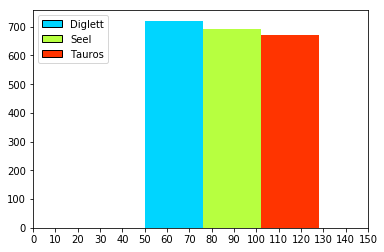

In [282]:
data = x['class']
#x.plot(kind='hist', bins=30, alpha=0.7, figsize=[15,6]);
fig = plt.subplot();
N,bins,patches=plt.hist([x['class'].values],bins=len(pokemons));
from matplotlib.patches import Rectangle 
cmap = plt.get_cmap('jet')
for i in range(0,len(pokemons)):
    patches[i].set_facecolor(cmap(name_dict[pokemons[i]]/150))
    

handles = [Rectangle((0,0),1,1,color=cmap(name_dict[pokemon]/150),ec="k") for pokemon in pokemons]

labels= pokemons
plt.legend(handles, labels)

    
plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]);

Is the dataset balanced?

**Your answer**: The dataset looks almost balanced and not completely balanced because all the classes do not contain equal number of samples.

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

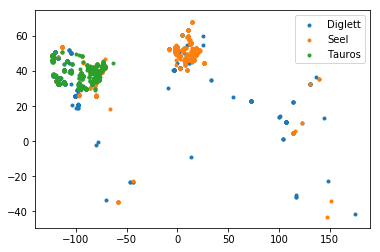

In [283]:
fig = plt.subplot();
for pokemon in pokemons:
        plt.scatter(x[x['class']==name_dict[pokemon]]['longitude'].values,x[(x['class']==name_dict[pokemon])]['latitude'].values,marker='.')
fig.legend(pokemons);



Is there any other visualization you think would be useful? If so, insert it here.

I think this is the best way to represnt and visualise the data.

How hard do you think the problem is? Which classes can/cannot be easily separated?

**Your answer**: ( in here) Without sufficient programming skills and knowledge about commands it might be quite difficlut to get this plot.

Which accuracy do you expect to achieve?

**Your answer**: (fill in here) I expect training accuracy, validation accuracy and test accuracy.

## 3. Preprocessing

Prepare input and output vectors.

In [284]:
X = x.as_matrix(('longitude','latitude'))
Y = x['class'].values 
print(x['class'].values );
y_du = pd.get_dummies(x['class']).values
#y = y_du.flatten()
print(y_du.shape)
print(y_du);

[ 50 128 128 ...  86  86 128]
(2083, 3)
[[1 0 0]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [0 0 1]]


D:\SP_5\rep2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y_du, test_size = 0.2, random_state = 10,shuffle='False')
print('X',X_test.shape)
print('y',y_test.shape)
print('X',X_train.shape)
print('y',y_train.shape)

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)


X (417, 2)
y (417, 3)
X (1666, 2)
y (1666, 3)


## 4. Training

Choose an architecture for your network.

In [286]:
#weights = keras.initializers.Constant(value=0.5);
from keras.optimizers import SGD

Pokemon_finder = Sequential()
Pokemon_finder.add(Dense(30, input_dim=2,activation='relu'))
Pokemon_finder.add(Dense(25, activation='relu'))
Pokemon_finder.add(Dense(3, activation='softmax'))

Pokemon_finder.compile(Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


Train the network. When training, separate 25% of your training data into a validation set.

In [287]:
Pokemon_finder.fit(X_train, y_train, epochs=50, validation_split=0.25,verbose=1);
#print(X_train.shape)
#print(y_train)
#print(X_validate.shape)
#print(y_validate.shape)

Train on 1249 samples, validate on 417 samples
Epoch 1/50
1249/1249 [==============================] - 1s 749us/step - loss: 1.8529 - acc: 0.3171 - val_loss: 1.2036 - val_acc: 0.5132
Epoch 2/50
1249/1249 [==============================] - 0s 45us/step - loss: 0.9309 - acc: 0.5917 - val_loss: 0.9525 - val_acc: 0.5779
Epoch 3/50
1249/1249 [==============================] - 0s 46us/step - loss: 0.8491 - acc: 0.6285 - val_loss: 0.9191 - val_acc: 0.5683
Epoch 4/50
1249/1249 [==============================] - 0s 46us/step - loss: 0.8247 - acc: 0.6365 - val_loss: 0.8808 - val_acc: 0.5899
Epoch 5/50
1249/1249 [==============================] - 0s 45us/step - loss: 0.8196 - acc: 0.6221 - val_loss: 0.9157 - val_acc: 0.5899
Epoch 6/50
1249/1249 [==============================] - 0s 48us/step - loss: 0.8096 - acc: 0.6397 - val_loss: 0.8549 - val_acc: 0.5851
Epoch 7/50
1249/1249 [==============================] - 0s 45us/step - loss: 0.7753 - acc: 0.6557 - val_loss: 0.8859 - val_acc: 0.5827
Epoch 8

For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [288]:
from sklearn.metrics import accuracy_score, confusion_matrix
Y_pred = Pokemon_finder.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(Y_pred, axis=1)
acc = accuracy_score(y_test_class, y_pred_class)
print("Accuracy: %.2f" % acc)


Accuracy: 0.66


Compute the confusion matrix of your predictions on the test set.

In [289]:
confusion_matrix(y_test_class, y_pred_class)

array([[96, 30, 17],
       [14, 86, 30],
       [52,  0, 92]], dtype=int64)

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Answer**: (fill in here)The confusion matrix yeilds the likelihood of the pokemons. It infers that the number of pokemons of each class can be likely found in the respective regions corresponding with the scatter plot in serction 2.

Is(are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer**: (fill in here) I think it would be good to add the terrain of the place where pokemons are found. I have added the terrainType coloumn to my Neural Network and results are down below.

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

(2083, 4)


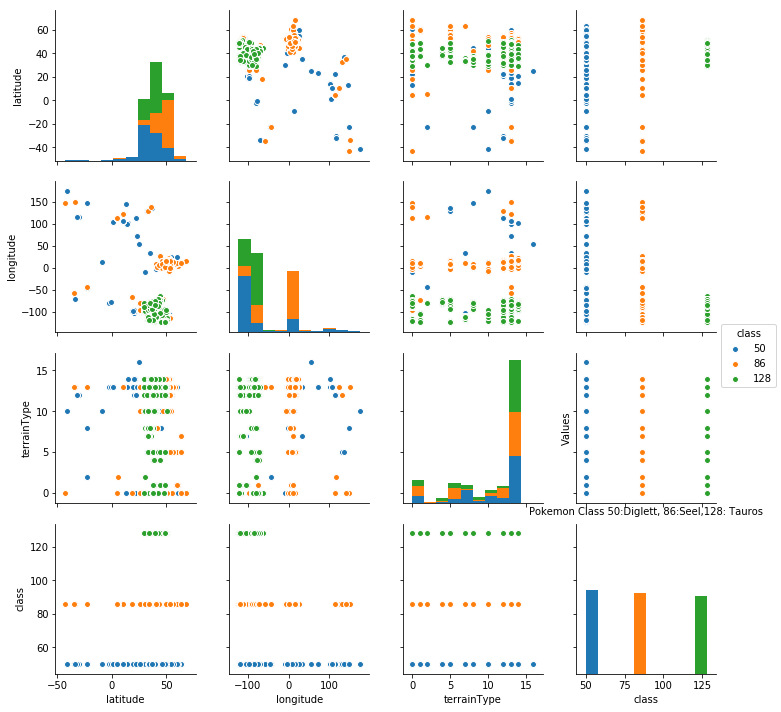

In [290]:
data_filtered = data_new_feature.loc[data_new_feature['class'].isin([50,86,128])];
print(data_filtered.shape)
sns.pairplot(data_filtered, hue='class');
plt.xlabel("Pokemon Class 50:Diglett, 86:Seel,128: Tauros")
plt.ylabel("Values")
#plt.title("Adding Aditional feature") # You can comment this line out if you don't need title
plt.show(fig)

What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

**Your answer**: (fill in here) The histogram shows the frequency of occurrencies of each class of pokemon with respect to the terrainType. Yes, it is benificial to add this data. As we can see below the efficiency and the predictions get better with this additional data. 

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [291]:
X_new_feature = data_filtered.as_matrix(('longitude','latitude','terrainType'));
print(X_new_feature.shape)

(2083, 3)


D:\SP_5\rep2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [292]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new_feature, y_du, test_size = 0.2, random_state = 10,shuffle='False')
print('X',X_test_new.shape)
print('y',y_test.shape)
print('X',X_train_new.shape)
print('y',y_train.shape)

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)


X (417, 3)
y (417, 3)
X (1666, 3)
y (1666, 3)


In [293]:
#weights = keras.initializers.Constant(value=0.5);
from keras.optimizers import SGD

Pokemon_finder_new = Sequential()
Pokemon_finder_new.add(Dense(30, input_dim=3,activation='relu'))
Pokemon_finder_new.add(Dense(25, activation='relu'))
Pokemon_finder_new.add(Dense(3, activation='softmax'))

Pokemon_finder_new.compile(Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [294]:
Pokemon_finder_new.fit(X_train_new, y_train, epochs=50, validation_split=0.25,verbose=1);
print(X_train_new.shape)
print(y_train)
#print(X_validate.shape)
#print(y_validate.shape)

Train on 1249 samples, validate on 417 samples
Epoch 1/50
1249/1249 [==============================] - 1s 774us/step - loss: 10.0027 - acc: 0.3323 - val_loss: 9.5658 - val_acc: 0.3333
Epoch 2/50
1249/1249 [==============================] - 0s 45us/step - loss: 7.6849 - acc: 0.3955 - val_loss: 5.5991 - val_acc: 0.4724
Epoch 3/50
1249/1249 [==============================] - 0s 44us/step - loss: 3.8771 - acc: 0.5204 - val_loss: 1.8127 - val_acc: 0.4772
Epoch 4/50
1249/1249 [==============================] - 0s 46us/step - loss: 0.9973 - acc: 0.5949 - val_loss: 0.9208 - val_acc: 0.5635
Epoch 5/50
1249/1249 [==============================] - 0s 46us/step - loss: 0.7997 - acc: 0.6477 - val_loss: 0.9075 - val_acc: 0.5923
Epoch 6/50
1249/1249 [==============================] - 0s 45us/step - loss: 0.7793 - acc: 0.6477 - val_loss: 0.9052 - val_acc: 0.5827
Epoch 7/50
1249/1249 [==============================] - 0s 46us/step - loss: 0.7599 - acc: 0.6581 - val_loss: 0.8556 - val_acc: 0.5899
Epoch 

In [295]:
from sklearn.metrics import accuracy_score, confusion_matrix
Y_pred_new = Pokemon_finder_new.predict(X_test_new)
y_test_class_new = np.argmax(y_test, axis=1)
y_pred_class_new = np.argmax(Y_pred_new, axis=1)
acc_new = accuracy_score(y_test_class, y_pred_class)
print("Accuracy: %.2f" % acc)


Accuracy: 0.66


In [296]:
confusion_matrix(y_test_class_new, y_pred_class_new)

array([[ 61,  42,  40],
       [  2, 103,  25],
       [ 12,  22, 110]], dtype=int64)

The Validation accuracy pretty much remian the same, but the classification is pretty clear when we use the terrain coloumn. The numbers in the confusion matrix is more promising than that with just longitude and latitude.